<a href="https://colab.research.google.com/github/AW17321/EEC-179/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-2398220725>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Accuracy: 0.804544756640565
Precision: 0.5651223776223776
Recall: 0.8230426479949077
F1 Score: 0.6701217932106763


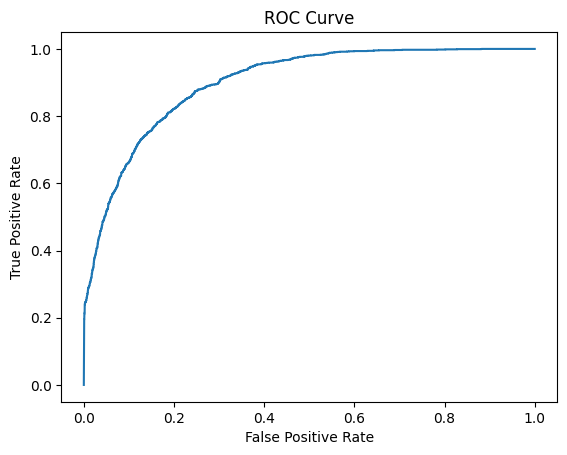

AUC: 0.899226830083198


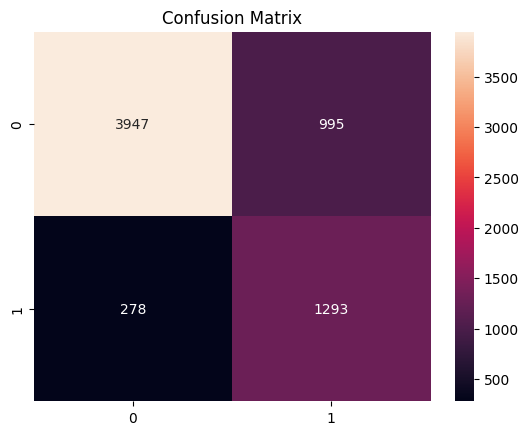

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

#Naive Bayes Classification

# Load the Adult Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
             'hoursperweek', 'native', 'Salary']
df = pd.read_csv(url, header=None, names=col_names, na_values=' ?')

# Replace missing values
for col in ['workclass', 'occupation', 'native']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# One-Hot Encoding
categorical_cols = df.select_dtypes(include='object').drop(columns='Salary').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Split Data
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary'].apply(lambda x: 1 if x == ' >50K' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred = nb_classifier.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# ROC Curve and AUC
y_prob = nb_classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

target_class
0    90.842552
1     9.157448
Name: proportion, dtype: float64


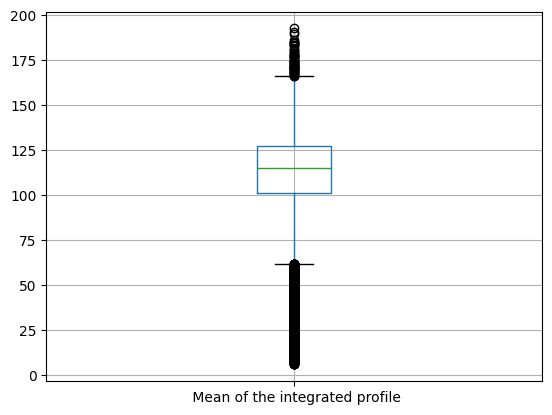

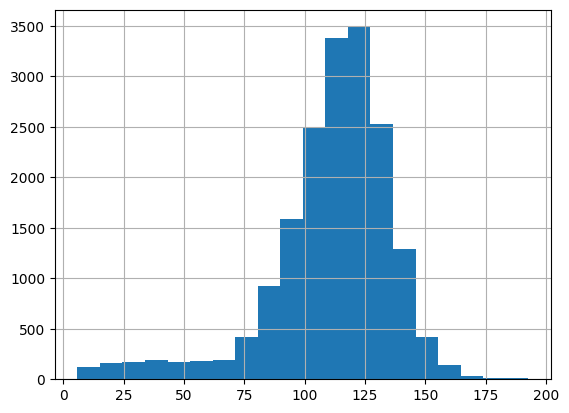

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

#Support Vector Machine
# Load Pulsar Dataset
df_pulsar = pd.read_csv('/content/sample_data/pulsar_stars.csv')

# Class Distribution
print(df_pulsar['target_class'].value_counts(normalize=True) * 100)

# Boxplot and Histogram
df_pulsar.boxplot(column=' Mean of the integrated profile')
plt.show()
df_pulsar[' Mean of the integrated profile'].hist(bins=20)
plt.show()

# Train-Test Split
X_p = df_pulsar.drop('target_class', axis=1)
y_p = df_pulsar['target_class']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)

# Feature Scaling
scaler_p = StandardScaler()
X_train_p_scaled = scaler_p.fit_transform(X_train_p)
X_test_p_scaled = scaler_p.transform(X_test_p)

# SVM Training and GridSearchCV
param_grid = {'C': [1, 10, 100], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
svc = SVC(probability=True)
grid = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)
grid.fit(X_train_p_scaled, y_train_p)

print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

# Evaluation
y_pred_p = grid.predict(X_test_p_scaled)
print("Accuracy:", accuracy_score(y_test_p, y_pred_p))
print("Precision:", precision_score(y_test_p, y_pred_p))
print("Recall:", recall_score(y_test_p, y_pred_p))
print("F1 Score:", f1_score(y_test_p, y_pred_p))

# Confusion Matrix and ROC Curve
sns.heatmap(confusion_matrix(y_test_p, y_pred_p), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

y_prob_p = grid.predict_proba(X_test_p_scaled)[:, 1]
fpr_p, tpr_p, _ = roc_curve(y_test_p, y_prob_p)
plt.plot(fpr_p, tpr_p)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC:", roc_auc_score(y_test_p, y_prob_p))


In [ ]:
!pip install scikeras

In [ ]:
!pip install --upgrade scikeras

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import tensorflow as tf
from scikeras.wrappers import KerasClassifier


# Load Pulsar Dataset
df_pulsar = pd.read_csv('/content/sample_data/pulsar_stars.csv')

# Train-Test Split
X_p = df_pulsar.drop('target_class', axis=1)
y_p = df_pulsar['target_class']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)

# Feature Scaling
scaler_p = StandardScaler()
X_train_p_scaled = scaler_p.fit_transform(X_train_p)
X_test_p_scaled = scaler_p.transform(X_test_p)


# Define MLP Function
def create_model(l1=8, l2=8, l3=8, optimizer='adam'):
    model = Sequential()
    model.add(Dense(l1, input_dim=X_train_p_scaled.shape[1], activation='relu'))
    model.add(Dense(l2, activation='relu'))
    model.add(Dense(l3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Pass the function itself, not the function call
# The build_fn parameter is deprecated in newer versions of Scikeras.
# Use build_fn=create_model should work, but let's update to the newer syntax just in case.
model = KerasClassifier(model=create_model, verbose=0)


# Hyperparameter Grid
param_grid_mlp = {
    'batch_size': [10, 20],
    'l1': [8, 16],
    'l2': [8, 16],
    'l3': [8, 16],
    'optimizer': ['adam', 'sgd']
}

grid_mlp = GridSearchCV(estimator=model, param_grid=param_grid_mlp, cv=3)
grid_mlp.fit(X_train_p_scaled, y_train_p)

print("Best Score:", grid_mlp.best_score_)
print("Best Parameters:", grid_mlp.best_params_)

# Final Model Training
best_model = grid_mlp.best_estimator_
history = best_model.fit(X_train_p_scaled, y_train_p, epochs=100, batch_size=grid_mlp.best_params_['batch_size'],
                         validation_split=0.2, verbose=0)

# Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()
plt.show()

# Test Set Evaluation
y_pred_mlp = (best_model.predict(X_test_p_scaled) > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test_p, y_pred_mlp))
print("Precision:", precision_score(y_test_p, y_pred_mlp))
print("Recall:", recall_score(y_test_p, y_pred_mlp))
print("F1 Score:", f1_score(y_test_p, y_pred_mlp))

sns.heatmap(confusion_matrix(y_test_p, y_pred_mlp), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import tensorflow as tf

# Extract first datapoint from Pulsar dataset (assuming it's loaded and scaled)
X_train_first = X_train_p_scaled[0].reshape(1, -1)
y_train_first = np.array([y_train_p.iloc[0]])

# Define the 3-layer ANN model
def create_custom_ann():
    model = Sequential()
    # Input layer to Hidden 1
    model.add(Dense(4, input_dim=X_train_p_scaled.shape[1], activation='sigmoid',
                    kernel_initializer=tf.keras.initializers.Constant(0),
                    bias_initializer=tf.keras.initializers.Constant(0)))
    # Hidden 1 to Hidden 2
    model.add(Dense(4, activation='sigmoid',
                    kernel_initializer=tf.keras.initializers.Constant(1),
                    bias_initializer=tf.keras.initializers.Constant(1)))
    # Hidden 2 to Output
    model.add(Dense(1, activation='sigmoid',
                    kernel_initializer=tf.keras.initializers.Constant(1),
                    bias_initializer=tf.keras.initializers.Constant(1)))

    # Compile model
    optimizer = SGD(learning_rate=0.1)
    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
    return model

# Instantiate model
custom_ann = create_custom_ann()

# Show initial weights and biases
print("\nInitial Weights and Biases:")
for layer in custom_ann.layers:
    weights, biases = layer.get_weights()
    print("Weights:\n", weights)
    print("Biases:\n", biases)

# Train for one epoch on first datapoint
history = custom_ann.fit(X_train_first, y_train_first, epochs=1, batch_size=1, verbose=0)

# Show updated weights and biases
print("\nUpdated Weights and Biases after 1 epoch:")
for layer in custom_ann.layers:
    weights, biases = layer.get_weights()
    print("Weights:\n", weights)
    print("Biases:\n", biases)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Initial Weights and Biases:
Weights:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Biases:
 [0. 0. 0. 0.]
Weights:
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Biases:
 [1. 1. 1. 1.]
Weights:
 [[1.]
 [1.]
 [1.]
 [1.]]
Biases:
 [1.]

Updated Weights and Biases after 1 epoch:
Weights:
 [[ 6.48835703e-06  6.48835703e-06  6.48835703e-06  6.48835703e-06]
 [-1.03097045e-05 -1.03097045e-05 -1.03097045e-05 -1.03097045e-05]
 [ 1.93777778e-05  1.93777778e-05  1.93777778e-05  1.93777778e-05]
 [ 2.05335600e-05  2.05335600e-05  2.05335600e-05  2.05335600e-05]
 [ 2.35897096e-05  2.35897096e-05  2.35897096e-05  2.35897096e-05]
 [ 3.04491059e-05  3.04491059e-05  3.04491059e-05  3.04491059e-05]
 [-2.23261213e-06 -2.23261213e-06 -2.23261213e-06 -2.23261213e-06]
 [ 1.42976087e-05  1.42976087e-05  1.42976087e-05  1.42976087e-05]]
Biases:
 [-7.182739e-05 -7.182739e-05 -7.182739e-05 -7.182739e-05]
Weights:
 [[0.999